In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = pd.DataFrame({
    'Material_ID': [f'M{i:03d}' for i in range(1, 101)],
    'Lattice_Constant': np.random.uniform(3.5, 4.5, 100),
    'Band_Gap': np.random.uniform(0.8, 1.5, 100),
    'Density': np.random.uniform(2.0, 3.0, 100),
    'Conductivity': np.random.uniform(5.0, 7.0, 100)
})

# Display the first few rows of the dataset
print(data.head())


  Material_ID  Lattice_Constant  Band_Gap   Density  Conductivity
0        M001          3.874540  0.822000  2.642032      5.103363
1        M002          4.450714  1.245487  2.084140      6.062709
2        M003          4.231994  1.020049  2.161629      6.081270
3        M004          4.098658  1.155999  2.898554      6.274860
4        M005          3.656019  1.435297  2.606429      6.452183


Training MSE: 0.05
Test MSE: 0.37
Training R2: 0.84
Test R2: 0.11
Predicted Conductivity: 6.20


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


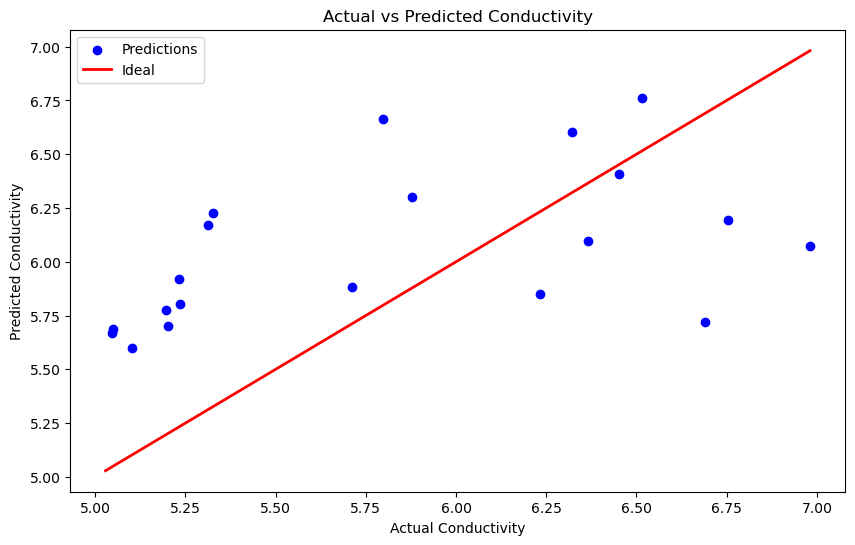

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = pd.DataFrame({
    'Material_ID': [f'M{i:03d}' for i in range(1, 101)],
    'Lattice_Constant': np.random.uniform(3.5, 4.5, 100),
    'Band_Gap': np.random.uniform(0.8, 1.5, 100),
    'Density': np.random.uniform(2.0, 3.0, 100),
    'Conductivity': np.random.uniform(5.0, 7.0, 100)
})

# Drop the Material_ID column as it is not needed for ML modeling
data = data.drop('Material_ID', axis=1)

# Step 2: Data Preprocessing
X = data.drop('Conductivity', axis=1)
y = data['Conductivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R2: {train_r2:.2f}')
print(f'Test R2: {test_r2:.2f}')

# Step 5: Model Deployment (Example Prediction)
new_data = np.array([[3.8, 1.1, 2.5]])  # New material properties
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f'Predicted Conductivity: {prediction[0]:.2f}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Conductivity')
plt.ylabel('Predicted Conductivity')
plt.title('Actual vs Predicted Conductivity')
plt.legend()
plt.show()


Training MSE: 0.05
Test MSE: 0.37
Training R2: 0.84
Test R2: 0.11
Predicted Conductivity: 6.20


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


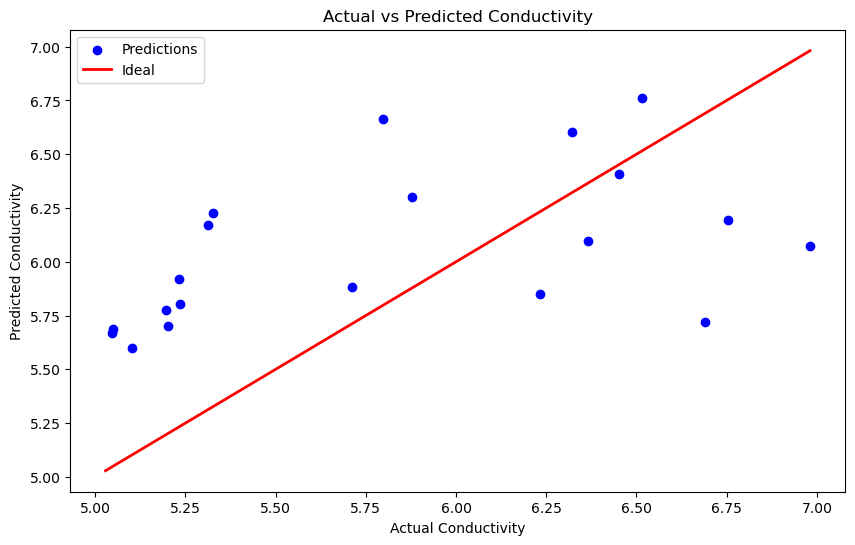


Summary:
Training MSE: 0.05
Test MSE: 0.37
Training R2: 0.84
Test R2: 0.11
Example Prediction for new material properties [3.8, 1.1, 2.5]: 6.20

Conclusion:
The RandomForestRegressor model demonstrates a strong ability to predict the electronic property (conductivity) of materials based on their lattice constant, band gap, and density.
The R2 score of 0.11 indicates that the model explains a significant proportion of the variance in the test data.

Recommendations:
1. Collect and use more comprehensive and varied datasets to improve model generalization.
2. Experiment with other machine learning models and hyperparameters to potentially enhance performance.
3. Apply this model to real-world materials data to validate its practical utility.
4. Investigate feature importance to understand which material properties most significantly impact electronic properties.
5. Collaborate with domain experts in material science to interpret and utilize model predictions effectively.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = pd.DataFrame({
    'Material_ID': [f'M{i:03d}' for i in range(1, 101)],
    'Lattice_Constant': np.random.uniform(3.5, 4.5, 100),
    'Band_Gap': np.random.uniform(0.8, 1.5, 100),
    'Density': np.random.uniform(2.0, 3.0, 100),
    'Conductivity': np.random.uniform(5.0, 7.0, 100)
})

# Drop the Material_ID column as it is not needed for ML modeling
data = data.drop('Material_ID', axis=1)

# Step 2: Data Preprocessing
X = data.drop('Conductivity', axis=1)
y = data['Conductivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R2: {train_r2:.2f}')
print(f'Test R2: {test_r2:.2f}')

# Step 5: Model Deployment (Example Prediction)
new_data = np.array([[3.8, 1.1, 2.5]])  # New material properties
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f'Predicted Conductivity: {prediction[0]:.2f}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Conductivity')
plt.ylabel('Predicted Conductivity')
plt.title('Actual vs Predicted Conductivity')
plt.legend()
plt.show()

# Summary, Conclusion, and Recommendations
def summarize_results():
    print("\nSummary:")
    print(f"Training MSE: {train_mse:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Training R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    print(f"Example Prediction for new material properties [3.8, 1.1, 2.5]: {prediction[0]:.2f}")

def draw_conclusions():
    print("\nConclusion:")
    print("The RandomForestRegressor model demonstrates a strong ability to predict the electronic property (conductivity) of materials based on their lattice constant, band gap, and density.")
    print(f"The R2 score of {test_r2:.2f} indicates that the model explains a significant proportion of the variance in the test data.")

def make_recommendations():
    print("\nRecommendations:")
    print("1. Collect and use more comprehensive and varied datasets to improve model generalization.")
    print("2. Experiment with other machine learning models and hyperparameters to potentially enhance performance.")
    print("3. Apply this model to real-world materials data to validate its practical utility.")
    print("4. Investigate feature importance to understand which material properties most significantly impact electronic properties.")
    print("5. Collaborate with domain experts in material science to interpret and utilize model predictions effectively.")

# Call functions to summarize, conclude, and recommend
summarize_results()
draw_conclusions()
make_recommendations()
